### Logistic, SVM

In [0]:
!pip install mglearn

    100% |████████████████████████████████| 542kB 22.0MB/s 
  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn

In [0]:
X, y = mglearn.datasets.make_forge()   # 데이터 만들기

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
print(X.shape, y.shape)
X

(26, 2) (26,)


array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [0]:
print(X[ :,0])   # X의 첫번째 열선택
print(X[ :,1])   # X의 두번째 열선택

array([ 9.96346605, 11.0329545 , 11.54155807,  8.69289001,  8.1062269 ,
        8.30988863, 11.93027136,  9.67284681,  8.34810316,  8.67494727,
        9.17748385, 10.24028948,  8.68937095,  8.92229526,  9.49123469,
        9.25694192,  7.99815287,  8.18378052,  8.7337095 ,  9.32298256,
       10.06393839,  9.50048972,  8.34468785,  9.50169345,  9.15072323,
       11.563957  ])

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


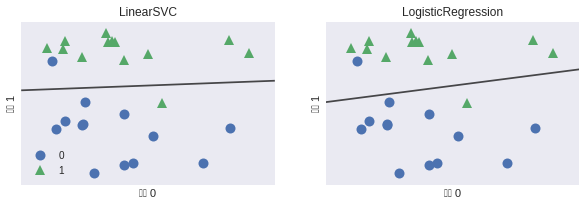

In [0]:
fig, axes = plt.subplots(1,2, figsize=(10,3))   # 1행 2열의 크기 10,3인 그래프 

models = [LinearSVC(), LogisticRegression()]
for model, ax in zip(models, axes):
  clf = model.fit(X,y)    # 모델 학습(fit)
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,  ax=ax, alpha=0.7)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))  # 모델명 
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend()
  

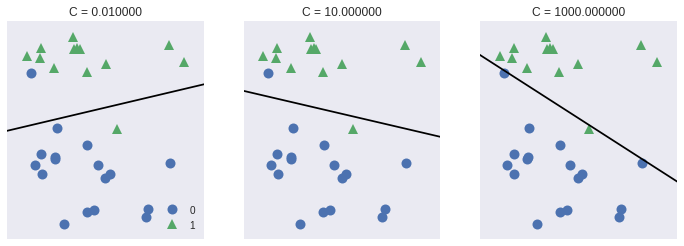

In [0]:
mglearn.plots.plot_linear_svc_regularization()

### 유방암 데이터 셋을 이용한 확인

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print(cancer.data.size)   # 데이터 크기 
print(cancer.data.shape)  # 데이터 행과 열
print(cancer.data.ndim)   # 데이터 배열
print(cancer.DESCR[:1500]) # 설명
print(cancer.keys() )      # 키값


17070
(569, 30)
2
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3

In [0]:
X_train, X_test, y_train, y_test = train_test_split( cancer.data, 
                                                    cancer.target,
                                                    stratify = cancer.target,
                                                    random_state=42)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [0]:
### 로지스틱 회귀 함수를 이용해서 훈련세트 점수와 테스트 세트 점수 구해주세요.
logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(
    logreg.score(X_test, y_test)))

훈련 세트 점수: 0.955
테스트 세트 점수: 0.958


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## C가 100일때
###  훈련세트의 정확도가 높아졌고, 테스트 세트의 정확도도 조금 증가함. (복잡도가 높을 수록 성능이 좋다.)

In [0]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

In [0]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

In [0]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
 lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
 print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
 C, lr_l1.score(X_train, y_train)))
 print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
 C, lr_l1.score(X_test, y_test)))
 plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.ylim(-5, 5)
plt.legend(loc=3)

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [0]:
linear_svm.coef_

In [0]:
linear_svm.intercept_  
# y1 = w1x1 + w2x2...  + b1
# y2 = w1x1 + w2x2...  + b2
# y3 = w1x1 + w2x2...  + b3

In [0]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [0]:
import numpy as np

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
 mglearn.cm3.colors):
 plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
 '클래스 2 경계'], loc=(1.01, 0.3))
